# PokeGAN
In our first notebook, we looked at how to create a StyleGAN alike GAN to generate Pokemons. We saw that the generated images were not satisfying and the GAN was only able to create overall structures of Pokemon. 

In this notebook, we will use a pre-trained StyleGAN and the original StyleGAN implementation from Nvidia to generate more satisfying Pokemon. And since we're are using a pre-trained GAN, we do not even need the dataset.

First, we need to make sure that we are using TensorFlow 1.x since the codebase we will be using is written using this TF version. You can always change the version of TensorFlow within Google Colab using the magic command `%tensorflow_verion 2.x`.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Next, we need to clone the codebase of StyleGAN from Nvidia, which is located on GitHub: https://github.com/NVlabs/stylegan.

Then we will download the weights of a pre-trained StyleGAN model. This model can then be loaded and used to make predictions. The model was trained by Michael Friese [tweet Michael Friese](https://twitter.com/MichaelFriese10/status/1127614400750346240). The same model was also used to generate the Pokemon on this website: https://thesepokemondonotexist.com/.

In [ ]:
!git clone https://github.com/NVlabs/stylegan.git
!mv stylegan/* .
!rm -rf stylegan/
!wget https://s3.amazonaws.com/devopstar/resources/stylegan-pokemon/MichaelFriese10_pokemon.pkl

Cloning into 'stylegan'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), done.
--2020-11-26 13:59:02--  https://s3.amazonaws.com/devopstar/resources/stylegan-pokemon/MichaelFriese10_pokemon.pkl
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.132.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.132.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 302550530 (289M) [application/x-www-form-urlencoded]
Saving to: ‘MichaelFriese10_pokemon.pkl’

MichaelFriese10_pok 100%[===================>] 288.53M  41.4MB/s    in 7.4s    

2020-11-26 13:59:10 (39.3 MB/s) - ‘MichaelFriese10_pokemon.pkl’ saved [302550530/302550530]



Now, as usual, we will import the needed packages. The `dnnlib` package is located in the cloned repository from before.

Since we are using TensorFlow 1.x, we will first need to initialize a session, which creates the TensorFlow graph. Next, we will also load the configurations from StyleGAN. We will then need to pass in these to the generator.

In [ ]:
import os
import pickle
import dnnlib.tflib as tflib
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

# initialize the tensorflow session
tflib.init_tf()

# load StyleGAN configs
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
truncation = 0.5

Here we will load the downloaded pokemon weights using `pickle`, which is a tool for serializing entire python objects. In our case, when we load the pickle file, we will get a generator, discriminator and a style generator. We will only use the style generator.

In [ ]:
# specify the path of the downloaded model
model = "MichaelFriese10_pokemon.pkl"
# load the model using pickle
with open(model, 'rb') as f:
    _G, _D, Gs = pickle.load(f)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Now we can use the loaded generator to create new Pokemon from a random latent vector. 

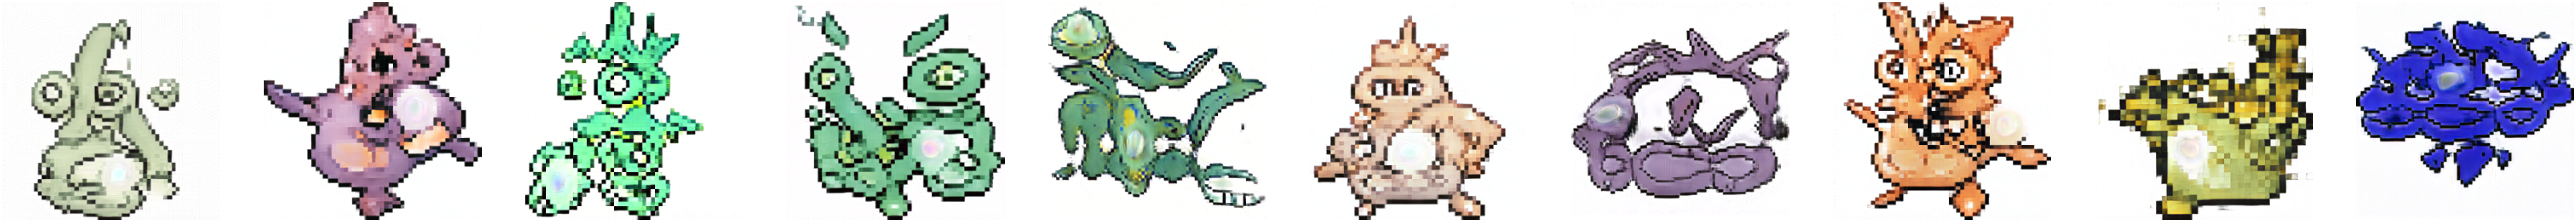

In [ ]:
# define our generation parameters
num_images = 10
scale = 15

# create our output folder for the generated pokemons
output_folder = "generated_pokemon"
output_file = "pokemon"
if not os.path.exists(output_folder):
  os.mkdir(output_folder)

# create random latent vectors
latents = np.random.RandomState(
    int(1000*random.random())).randn(num_images, *Gs.input_shapes[0][1:])
# pass the latent vectors to the generator, 
# this outputs our generated images
images = Gs.run(latents, None, truncation_psi=truncation,
                randomize_noise=True, output_transform=fmt)

# plot our grid of generated images
plt.figure(figsize=(scale*num_images, scale))
for i, img in enumerate(images):
  plt.subplot(1, num_images, i+1)
  plt.imshow(img)
  plt.axis('off')
  # save the pokemon
  image = Image.fromarray(img)
  image.save("{0}/{1}_{2}.png".format(output_folder, output_file, i+1))

As a final step, we can download our generated Pokemon.

In [ ]:
!zip -r ./generated_pokemon.zip ./generated_pokemon/
from google.colab import files
files.download("generated_pokemon.zip")
!rm -rf ./generated_pokemon

  adding: generated_pokemon/ (stored 0%)
  adding: generated_pokemon/pokemon_7.png (deflated 0%)
  adding: generated_pokemon/pokemon_4.png (deflated 0%)
  adding: generated_pokemon/pokemon_5.png (deflated 0%)
  adding: generated_pokemon/pokemon_6.png (deflated 0%)
  adding: generated_pokemon/pokemon_10.png (deflated 0%)
  adding: generated_pokemon/pokemon_9.png (deflated 0%)
  adding: generated_pokemon/pokemon_8.png (deflated 0%)
  adding: generated_pokemon/pokemon_1.png (deflated 0%)
  adding: generated_pokemon/pokemon_2.png (deflated 0%)
  adding: generated_pokemon/pokemon_3.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>